In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
affordable_housing = pd.read_csv('../data/clean/result.csv')
affordable_housing["CITY"] = affordable_housing["CITY"].apply(lambda x: x.lower())
affordable_housing["ZIPCODE"] = affordable_housing["ZIPCODE"].apply(lambda x: str(x).zfill(5))

affordable = affordable_housing[affordable_housing["IS_AFFORDABLE"] == True].reset_index(drop=True)
non_affordable = affordable_housing[affordable_housing["IS_AFFORDABLE"] == False].reset_index(drop=True)
affordable_housing

,OWN_OCC,LU_DESC,UNIT_NUM,ST_NUM,ST_NAME,ZIPCODE,CITY,RES_UNITS,OWNER,join_idx,IS_AFFORDABLE
0,Y,THREE-FAM DWELLING,NaN,104.0,PUTNAM ST,02128,east boston,0,PASCUCCI CARLO,104 putnam,False
1,Y,THREE-FAM DWELLING,NaN,197.0,LEXINGTON ST,02128,east boston,0,SEMBRANO RODERICK,197 lexington,False
2,N,THREE-FAM DWELLING,NaN,199.0,LEXINGTON ST,02128,east boston,0,CHEVARRIA ANA S,199 lexington,False
3,N,THREE-FAM DWELLING,NaN,201.0,LEXINGTON ST,02128,east boston,0,"MADDALENI JAMES E, TS",201 lexington,False
4,Y,TWO-FAM DWELLING,NaN,203.0,LEXINGTON ST,02128,east boston,0,DIGIROLAMO JOHN A,203 lexington,False
...,...,...,...,...,...,...,...,...,...,...,...
275405,N,STRIP CTR STORES,NaN,2198.0,COMMONWEALTH AV,02135,brighton,0,GREALISH MARTIN J TRST,2198 commonwealth,False
275406,N,STRIP CTR STORES,NaN,2199.0,COMMONWEALTH AV,02135,brighton,0,GREALISH MARTIN J TRST,2199 commonwealth,False
275407,N,STRIP CTR STORES,NaN,2200.0,COMMONWEALTH AV,02135,brighton,0,GREALISH MARTIN J TRST,2200 commonwealth,False
275408,N,STRIP CTR STORES,NaN,2201.0,COMMONWEALTH AV,02135,brighton,0,GREALISH MARTIN J TRST,2201 commonwealth,False


In [14]:
neighborhood = pd.read_csv('../data/clean/neighborhood.csv')
neighborhood["city"] = neighborhood["city"].apply(lambda x: x.lower())
neighborhood

,city,white,white.1,black,black.1,hispanic,hispanic.1,asian,other,household,...,juvenile,nursing,other_institutional,noninstitutionalized,college,military,other_noninstitutional,occupied,vacant,household_size
0,allston,14634,14022,1451,1294,3657,3071,7173,1706,25231,...,0,26,0,3364,3214,0,150,11740,787,2.149148
1,back bay,14056,13296,718,669,1326,1205,2604,884,17618,...,0,269,0,1701,1578,0,123,10788,1585,1.633111
2,beacon hill,7521,6980,252,231,537,475,630,396,9303,...,0,0,0,33,0,0,33,5485,552,1.696080
3,brighton,30596,28706,2289,1966,4978,4043,7801,2666,44308,...,13,240,56,3713,3493,0,220,20822,1052,2.127942
4,charlestown,13626,11689,990,662,2075,1387,1650,779,19010,...,0,55,0,55,0,30,25,8932,593,2.128303
5,chinatown,1898,1790,297,254,477,412,4281,190,6462,...,0,224,0,457,443,0,14,3299,345,1.958775
6,dorchester,27411,24327,42714,32678,25285,17390,13360,13421,120678,...,286,291,0,936,0,0,936,44823,3142,2.692323
7,downtown,9174,8764,537,529,961,877,2286,493,9238,...,0,97,0,4116,3283,0,833,5401,1253,1.710424
8,east boston,15760,14039,1403,1136,21700,16256,1932,2271,42813,...,12,132,0,109,0,0,109,16695,1321,2.564420
9,fenway,20456,20099,2396,2281,3643,3425,9218,2020,21013,...,0,261,0,16406,16197,0,209,12661,1307,1.659664


# 1. What is the current distribution of landlords NOT currently enrolled in different affordable housing programs?

In [15]:
# 1.1 # of non-affordable units
num_units_non_affordable = non_affordable["RES_UNITS"].sum()
print(f"1.1 Number of units in non-affordable housing: {num_units_non_affordable:,d}")

1.1 Number of units in non-affordable housing: 433,691


1.2 Geographic distribution by zip code of non-affordable units


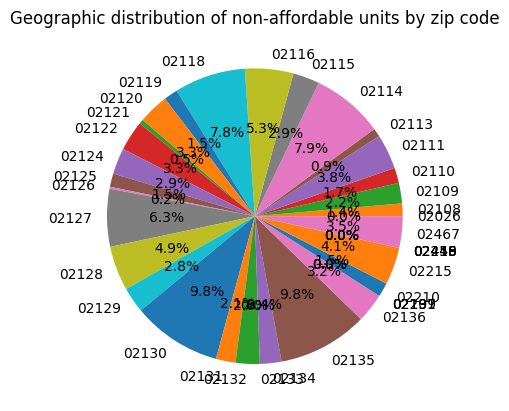

In [16]:
# 1.2 Geographic distribution by zip code of non-affordable units
print(f"1.2 Geographic distribution by zip code of non-affordable units")
non_affordable_zip = non_affordable.groupby("ZIPCODE").sum(numeric_only=True)["RES_UNITS"]
zip_codes = non_affordable_zip.index
plt.pie(non_affordable_zip, labels=zip_codes, autopct='%1.1f%%')
plt.title("Geographic distribution of non-affordable units by zip code")
plt.show()

1.3 Demographic profile of census block groups
In non-affordable districts, the most prevalent races are:


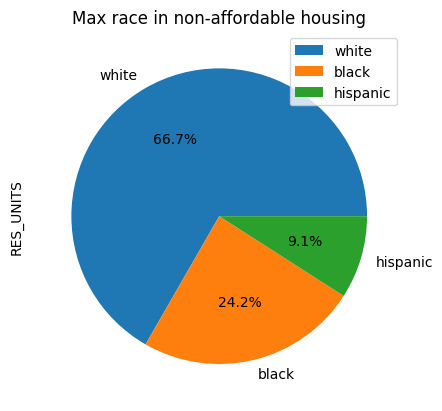

In [17]:
# 1.3 Demographic profile of census block groups (majority race, ethnicity, income)
print(f"1.3 Demographic profile of census block groups")

# merge neighborhood and non_affordable
non_affordable_per_city = non_affordable.groupby("CITY").sum(numeric_only=True)[["RES_UNITS"]]
non_affordable_with_races = non_affordable_per_city.merge(neighborhood, left_on="CITY", right_on="city")

# Plot distribution of race
print("In non-affordable districts, the most prevalent races are:")
race_columns = ["white", "black", "asian", "hispanic", "other"]
def get_max_race(row):
    max_race = max(row[race_columns])
    for race in race_columns:
        if row[race] == max_race:
            return race

non_affordable_with_races["max_race"] = non_affordable_with_races.apply(get_max_race, axis=1)
non_affordable_with_races.groupby("max_race").sum(numeric_only=True)[["RES_UNITS"]].sort_values(by="RES_UNITS", ascending=False).plot.pie(y="RES_UNITS", autopct='%1.1f%%')
plt.title("Max race in non-affordable housing")
plt.show()

## b) What is the breakdown of landlords (in percent) listed under current affordable housing programs?

TRUSTEES OF BOSTON COLLEGE             185
BUCKMINSTER HOTEL CORP                 132
CITY OF BOSTON                         109
121 PORTLAND LLC                        37
420 WEST BROADWAY CONDOMINIUM TRUST     36
FENWAY APARTMENTS LLC MASS LLC          32
PUTNAM 234 ASSOCIATES LLC MASS LLC      20
MASS BAY TRANSPORTATION AUTH            15
CHARLESTOWN PROPERTIES LLC              14
CITY OF BOSTON BY FCL                   13
Name: OWNER, dtype: int64

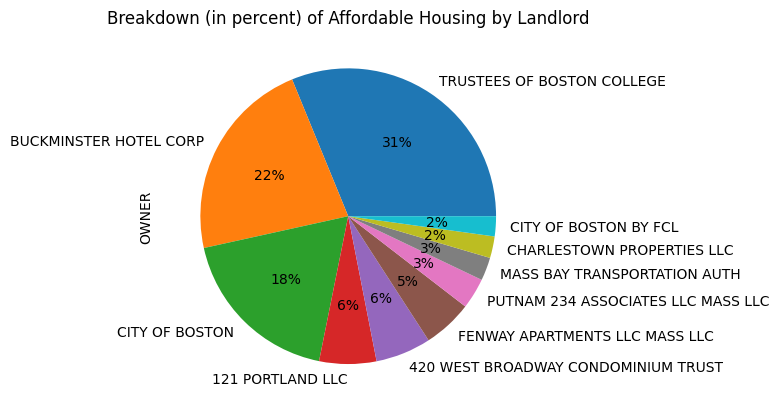

In [18]:
distribution = affordable["OWNER"].value_counts().head(10)
distribution.plot.pie(autopct='%.0f%%', title="Breakdown (in percent) of Affordable Housing by Landlord")
distribution

## c) What is the geographic distribution of these landlords by city council district?

boston             3451
south boston        582
dorchester          555
east boston         473
brighton            444
jamaica plain       279
charlestown         245
allston             237
roxbury             144
west roxbury         81
hyde park            45
roxbury crossin      36
mattapan             32
roslindale           22
chestnut hill         2
Name: CITY, dtype: int64

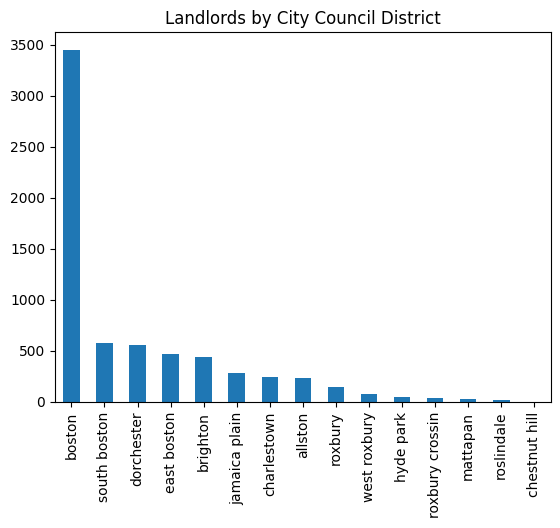

In [19]:
distribution = affordable["CITY"].value_counts()
distribution.plot(kind='bar', title='Landlords by City Council District')
distribution

# d) What percentage of housing stock is owned by owner occupied and small landlords, and at what % affordable

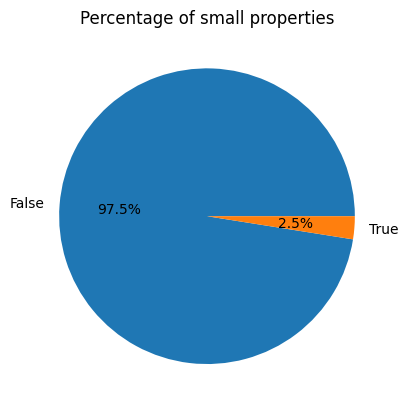

In [26]:
# Get small properties
small = affordable_housing[affordable_housing["RES_UNITS"] <= 6]

# Plot percentage of small properties
plt.pie((affordable_housing["RES_UNITS"] <= 6).value_counts(), labels=["False", "True"], autopct='%1.1f%%')
plt.title("Percentage of small properties")
plt.show()

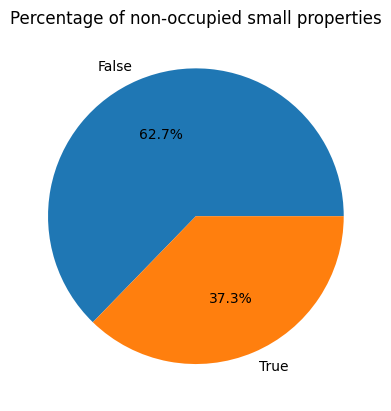

In [28]:
# Get non-occupied small properties
small_unocc = small[small["OWN_OCC"] == "N"]

# Plot percentage of non-occupied small properties
plt.pie((small["OWN_OCC"] == "N").value_counts(), labels=["False", "True"], autopct='%1.1f%%')
plt.title("Percentage of non-occupied small properties")
plt.show()

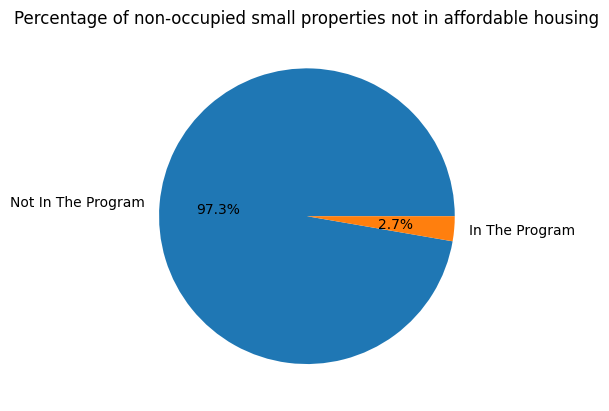

In [31]:
# Get non-occupied small properties not in affordable housing
small_unocc_non_aff = small_unocc[small_unocc["IS_AFFORDABLE"] == False]

# Plot percentage of non-occupied small properties not in affordable housing
plt.pie((small_unocc["IS_AFFORDABLE"] == False).value_counts(), labels=["Not In The Program", "In The Program"], autopct='%1.1f%%')
plt.title("Percentage of non-occupied small properties not in affordable housing")
plt.show()